# D209 Data Mining 1 - Task 1: Classification Analysis

## Jan Francis Mitchell Barlaan 

### A1: PROPOSAL OF QUESTION
* The research question I aim to answer in this task using k-nearest neighbor (KNN) is which customer socioeconomic factors influence churn the most? I believe this is important in custom-tailoring services and plans on an individual customer basis, which can help promote customer satisfaction and continued service subscription.

### A2: GOALS 
* The goal for this analysis is to discover patterns and specific variables that are more likely to contribute to customer churn and see how this model's accuracy compares to the logistic regression model accuracy that we have previously seen in the prior course. An ideal outcome would be better accuracy and at minimum an equivalent with that of the logistic regression model accuracy. 

### B1: EXPLANATION OF CLASSIFICATION METHOD 
* I chose KNN since it does not require any assumptions about underlying data distribution, and it can also handle both numerical and categorical data. Another useful characteristic of KNN is that it is less sensitive to outliers compared to other algorithms (GeeksforGeeks, K-Nearest Neighbor(KNN) algorithm 2024).



### B2: SUMMARY OF METHOD ASSUMPTION
* KNN is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. It works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance (Sharma, 2024). The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data (Kumar, 2020).

### B3: PACKAGES OR LIBRARIES LIST
I chose to use Python 3 kernel within the Jupyter Notebook IDE to perform this task due to its ease of use and integration with visualization and statistical modeling. Using Python as the main programming language also enabled me to use several libraries:
* Pandas was used to easily handle large datasets
* Numpy was used in mathematical calculations and operations
* Matplotlib and Seaborn was used for visualizations
* Scipy assisted in MLR modeling 
* Scikit-learn was used to perform the train test 

### C1:DATA PREPROCESSING
* My data preprocessing goals involve the same basic data cleaning steps that I have performed in previous tasks, which include detecting duplicates, nulls, and outliers and addressing them if present. Outliers will be detected for with boxplots and Z-score calculations. Yes/No categorical variables will also be re-expressed in binary 1/0 format so that the KNN algorithm can properly process them. Also, in a later step I will create a new dataframe with only the columns that include my chosen dependent and independent variables for analysis. The following code is what I used to accomplish these data cleaning goals.

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D209\Starting Datasets\Churn/churn_clean.csv', index_col=0)

In [3]:
#Preview loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

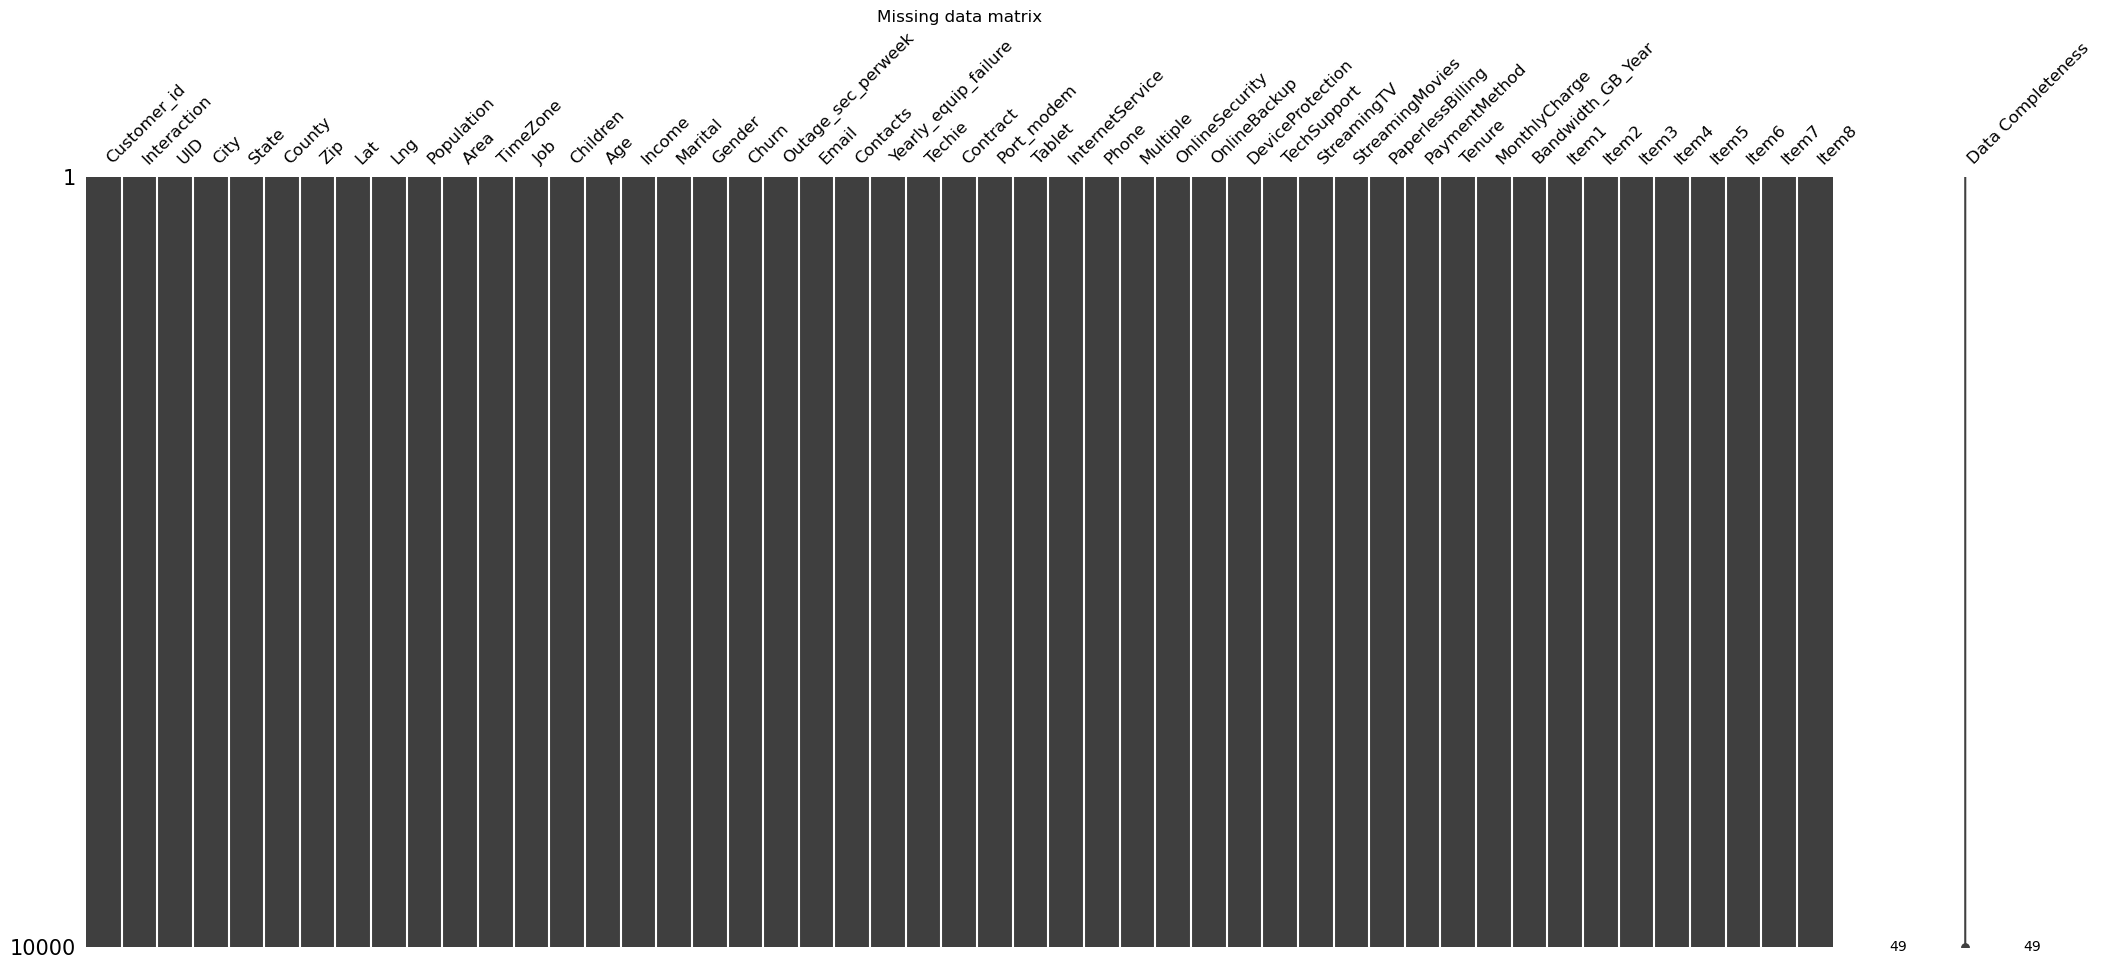

In [7]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


### C2: DATA SET VARIABLES
* The following variables will be used in this task: Churn, Techie, TechSupport, StreamingTV, StreamingMovies, Phone, Multiple, Tablet, DeviceProtection, OnlineSecurity, OnlineBackup, PaperlessBilling, MonthlyCharge, Bandwidth_GB_Year

* Churn will be our dependent variable and the other 13 will be our independent variables
| Variable    | Categorical/Continuous | Independent/Dependent |
| :--------: | :-------: |:-------: |
| Churn  | Categorical | Dependent |
| Techie | Categorical | Independent |
| TechSupport | Categorical | Independent |
| StreamingTV | Categorical | Independent |
| StreamingMovies | Categorical | Independent |
| Phone | Categorical | Independent |
| Multiple | Categorical | Independent |
| Tablet | Categorical | Independent |
| DeviceProtection | Categorical | Independent |
| OnlineSecurity | Categorical | Independent |
| OnlineBackup | Categorical | Independent |
| PaperlessBilling | Categorical | Independent |
| MonthlyCharge | Continuous | Independent |
| Bandwidth_GB_Year | Continuous | Independent |


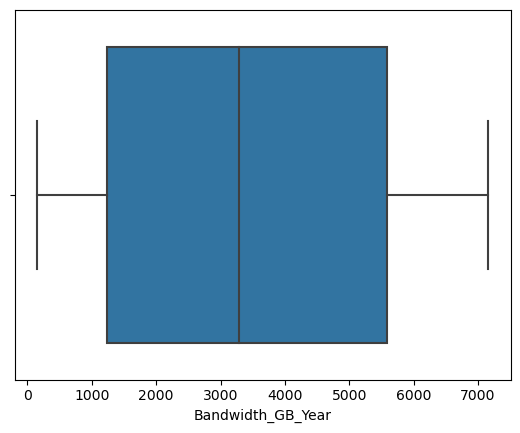

In [8]:
#Outlier check with boxplot on numerical continuous independent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

In [9]:
#Calculate Z-score for 'Bandwidth_GB_Year'

df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
df[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head(40)

,Bandwidth_GB_Year,Z_Score_Bandwidth_GB_Year
CaseOrder,,
1,904.536110,-1.138487
2,800.982766,-1.185876
3,2054.706961,-0.612138
4,2164.579412,-0.561857
5,271.493436,-1.428184
6,1039.357983,-1.076789
7,1907.242972,-0.679621
8,979.612708,-1.104130
9,1312.874964,-0.951620


In [10]:
#Print number of outliers based on z-score for 'Bandwidth_GB_Year'

df_outliers = df.query('(Z_Score_Bandwidth_GB_Year > 3) | (Z_Score_Bandwidth_GB_Year < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Bandwidth_GB_Year'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


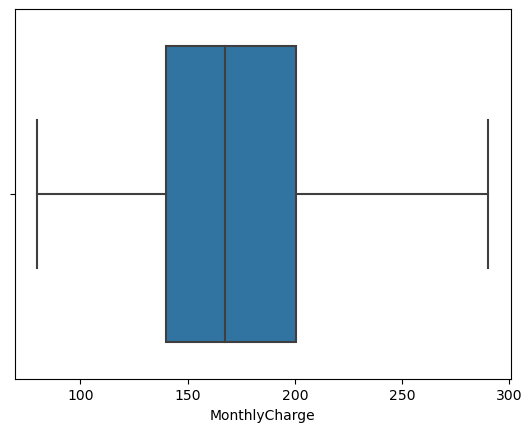

In [11]:
#Outlier check with boxplot on numerical continuous independent variable 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

In [12]:
#Calculate Z-score for 'MonthlyCharge'

df['Z_Score_MonthlyCharge']=stats.zscore(df['MonthlyCharge'])
df[['MonthlyCharge','Z_Score_MonthlyCharge']].head(40)

,MonthlyCharge,Z_Score_MonthlyCharge
CaseOrder,,
1,172.455519,-0.003943
2,242.632554,1.630326
3,159.947583,-0.295225
4,119.956840,-1.226521
5,149.948316,-0.528086
6,185.007692,0.288370
7,200.118516,0.640268
8,114.950905,-1.343098
9,117.468591,-1.284467


In [13]:
#Print number of outliers based on z-score for 'MonthlyCharge'

df_outliers = df.query('(Z_Score_MonthlyCharge > 3) | (Z_Score_MonthlyCharge < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['MonthlyCharge'].to_dict().values())


Number of outliers: 0
Outlier values: dict_values([])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int

### C3: STEPS FOR ANALYSIS
* The following code shows the summary statistics for my chosen dependent and independent variables. My chosen dependent variable 'Churn' is a binary categorical variable as well as 11 of the 13 independent variables I have chosen for this analysis. Therefore, summary statistics for those variables will be shown with the value_counts() function, which shows the 'Yes' and 'No' count breakdowns. The other two independent variables 'MonthlyCharge' and 'Bandwidth_GB_Year' are continuous numerical variables, therefore I will use the describe() function to show their summary statistics. This function shows percentiles, standard deviation, min, max, and mean.

* After data cleaning and summary statistics, the following code shows the transformation and preparation steps I have taken with this data set prior to runing the KNN model. I established boolean indexing to my categorical variables and converted the yes/no format to 1/0. Next, I check the correlation coefficients for our chosen features against 'Churn'. Finally, I saved only the 14 chosen variables into a new data frame called 'KNN_prepared_df'.

In [15]:
#Categorical variables

In [16]:
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [17]:
df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [18]:
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [19]:
df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [20]:
df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [21]:
df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [22]:
df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [23]:
df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [24]:
df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [25]:
df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [26]:
df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [27]:
df.PaperlessBilling  .value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [28]:
#Numerical variables

In [29]:
df.MonthlyCharge.describe() 

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [30]:
df.Bandwidth_GB_Year.describe() 

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [31]:
#Re-expression of categorical variables

#Establish boolean indexing
boolean_mapping = {'Yes' : 1, 'No' : 0}

#Then, convert 'Churn', 'Techie','TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity','OnlineBackup', and 'PaperlessBilling' columns to booleans from string
df['Churn'] = df['Churn'].map(boolean_mapping)
df['Techie'] = df['Techie'].map(boolean_mapping)
df['TechSupport'] = df['TechSupport'].map(boolean_mapping)
df['StreamingTV'] = df['StreamingTV'].map(boolean_mapping)
df['StreamingMovies'] = df['StreamingMovies'].map(boolean_mapping)
df['Phone'] = df['Phone'].map(boolean_mapping)
df['Multiple'] = df['Multiple'].map(boolean_mapping)
df['Tablet'] = df['Tablet'].map(boolean_mapping)
df['DeviceProtection'] = df['DeviceProtection'].map(boolean_mapping)
df['OnlineSecurity'] = df['OnlineSecurity'].map(boolean_mapping)
df['OnlineBackup'] = df['OnlineBackup'].map(boolean_mapping)
df['PaperlessBilling'] = df['PaperlessBilling'].map(boolean_mapping)


In [32]:
#Create new dataframe
KNN_prepared_df = df[['Churn', 'Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year']]

KNN_prepared_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              10000 non-null  int64  
 1   Techie             10000 non-null  int64  
 2   TechSupport        10000 non-null  int64  
 3   StreamingTV        10000 non-null  int64  
 4   StreamingMovies    10000 non-null  int64  
 5   Phone              10000 non-null  int64  
 6   Multiple           10000 non-null  int64  
 7   Tablet             10000 non-null  int64  
 8   DeviceProtection   10000 non-null  int64  
 9   OnlineSecurity     10000 non-null  int64  
 10  OnlineBackup       10000 non-null  int64  
 11  PaperlessBilling   10000 non-null  int64  
 12  MonthlyCharge      10000 non-null  float64
 13  Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [33]:
KNN_prepared_df.head()

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,
1,0,0,0,0,1,1,0,1,0,1,1,1,172.455519,904.536110
2,1,1,0,1,1,1,1,1,0,1,0,1,242.632554,800.982766
3,0,1,0,0,1,1,1,0,0,0,0,1,159.947583,2054.706961
4,0,1,0,1,0,1,0,0,0,1,0,1,119.956840,2164.579412
5,1,0,1,1,0,0,0,0,0,0,0,0,149.948316,271.493436


In [34]:
#Checking correlations between variables

KNN_prepared_df.corr().abs().sort_values(by='Churn', ascending=False)

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
Churn,1.000000,0.066722,0.018838,0.230151,0.289262,0.026297,0.131771,0.002779,0.056489,0.013540,0.050508,0.007030,0.372938,0.441669
Bandwidth_GB_Year,0.441669,0.009455,0.000120,0.054314,0.045600,0.001332,0.006823,0.002129,0.007856,0.021006,0.041740,0.002470,0.060406,1.000000
MonthlyCharge,0.372938,0.007185,0.120301,0.482312,0.608115,0.018977,0.385979,0.007280,0.162735,0.047734,0.259440,0.001348,1.000000,0.060406
StreamingMovies,0.289262,0.004298,0.013533,0.010516,1.000000,0.002588,0.004691,0.020710,0.019450,0.010575,0.001434,0.000692,0.608115,0.045600
StreamingTV,0.230151,0.003436,0.003047,1.000000,0.010516,0.012464,0.003097,0.018233,0.002878,0.001415,0.008043,0.016353,0.482312,0.054314
Multiple,0.131771,0.004661,0.010360,0.003097,0.004691,0.003398,1.000000,0.019828,0.003207,0.002436,0.002566,0.004657,0.385979,0.006823
Techie,0.066722,1.000000,0.007391,0.003436,0.004298,0.003081,0.004661,0.010992,0.021346,0.015300,0.004540,0.001311,0.007185,0.009455
DeviceProtection,0.056489,0.021346,0.004475,0.002878,0.019450,0.030339,0.003207,0.005657,1.000000,0.012852,0.009991,0.013166,0.162735,0.007856
OnlineBackup,0.050508,0.004540,0.002802,0.008043,0.001434,0.003172,0.002566,0.003400,0.009991,0.010338,1.000000,0.010034,0.259440,0.041740
Phone,0.026297,0.003081,0.005060,0.012464,0.002588,1.000000,0.003398,0.024825,0.030339,0.001177,0.003172,0.009228,0.018977,0.001332


In [35]:
#Checking the transformed data one final time prior to exportation into our working .csv file

KNN_prepared_df.head()

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,
1,0,0,0,0,1,1,0,1,0,1,1,1,172.455519,904.536110
2,1,1,0,1,1,1,1,1,0,1,0,1,242.632554,800.982766
3,0,1,0,0,1,1,1,0,0,0,0,1,159.947583,2054.706961
4,0,1,0,1,0,1,0,0,0,1,0,1,119.956840,2164.579412
5,1,0,1,1,0,0,0,0,0,0,0,0,149.948316,271.493436


### C4: CLEANED DATA SET
* The cell below contains the code run to create the prepared dataset for the KNN model

In [36]:
# Save dataframe to CSV and ignore index 

KNN_prepared_df.to_csv (r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D209\PA Task 1\KNN_churn_prepared.csv', index = False)

### D1: SPLITTING THE DATA

* In this step, I chose the standard good practice 80:20 split for train-test. This is also known as the Pareto Principle. This principle states that, in most cases, 80% of effects come from 20% of causes (Detective, 2020). 

In [37]:
#Data split into train data and test data. I will choose the standard good practice train-test split of 80:20,

X = df[['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)

y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

In [38]:
#Saving four train/test datasets for X/y to CSV 
X_train.to_csv('D209_Task_1_X_train.csv', index=False)
X_test.to_csv('D209_Task_1_X_test.csv', index=False)
y_train.to_csv('D209_Task_1_y_train.csv', index=False)
y_test.to_csv('D209_Task_1_y_test.csv', index=False)

### D2: OUTPUT AND INTERMEDIATE CALCULATIONS
* In order to determine the appropriate value of 'k' for our mode, I used GridSearchCV to test values and pick the one that produces the model with the highest accuracy (Shah, 2024). In our case, this number is 17. Subsequently, I moved forward with KNN classification and generated the AUC score and ROC curve with the code below (Bhandari, 2024). 

In [39]:
# Determine what is the best number of neighbors to use for KNN classification, from values of k = 1 to k = 50
param_grid = {'n_neighbors' : np.arange(1, 50)}

# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit to training data
knn_cv.fit(X_train, y_train)

# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 17}

In [40]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.8258749999999999

The confusion matrix for this KNN model:
Predicted No Churn | Predicted Churn
                 [1362  108] Actual No Churn
                 [228 302] Actual Churn
The training accuracy of this KNN classification is 0.842625.
The testing accuracy of this KNN classification model is 0.832.


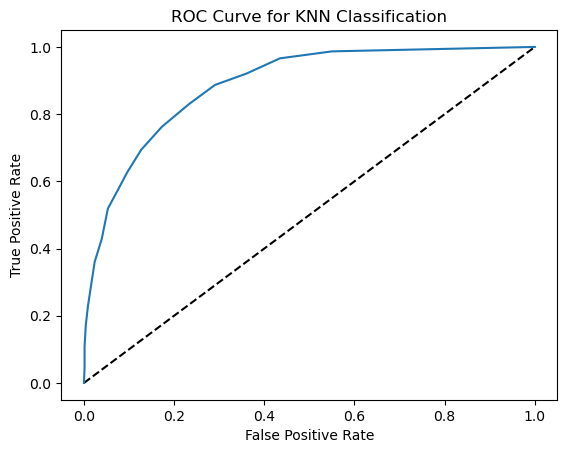

The Area Under the Curve (AUC) score is: 0.886940059042485

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1470
           1       0.74      0.57      0.64       530

    accuracy                           0.83      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.82      0.83      0.82      2000



In [41]:
# Perform KNN using the value of k=17 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 17)

# Fit to the training data
knn.fit(X_train, y_train)

# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No Churn | Predicted Churn")
print(f"                 {final_matrix[0]} Actual No Churn")
print(f"                 {final_matrix[1]} Actual Churn")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")


# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))


### D3: CODE EXECUTION

In [42]:
#Data split into train data and test data. I will choose the standard good practice train-test split of 80:20,

X = df[['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)

y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

In [43]:
# Determine what is the best number of neighbors to use for KNN classification, from values of k = 1 to k = 50
param_grid = {'n_neighbors' : np.arange(1, 50)}

# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit to training data
knn_cv.fit(X_train, y_train)

# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 17}

In [44]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.8258749999999999

The confusion matrix for this KNN model:
Predicted No Churn | Predicted Churn
                 [1362  108] Actual No Churn
                 [228 302] Actual Churn
The training accuracy of this KNN classification is 0.842625.
The testing accuracy of this KNN classification model is 0.832.


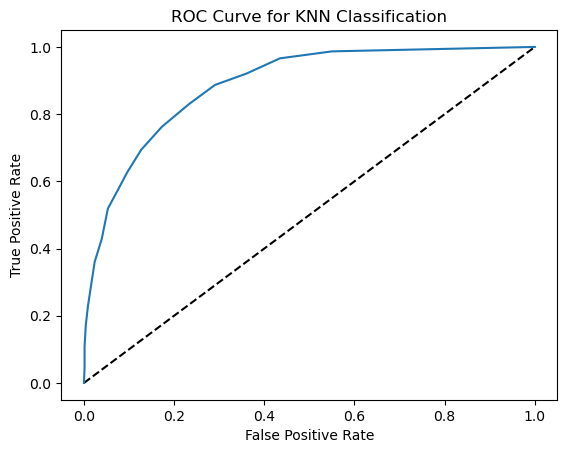

The Area Under the Curve (AUC) score is: 0.886940059042485

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1470
           1       0.74      0.57      0.64       530

    accuracy                           0.83      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.82      0.83      0.82      2000



In [45]:
# Perform KNN using the value of k=17 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 17)

# Fit to the training data
knn.fit(X_train, y_train)

# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No Churn | Predicted Churn")
print(f"                 {final_matrix[0]} Actual No Churn")
print(f"                 {final_matrix[1]} Actual Churn")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")


# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

### E1: ACCURACY AND AUC
* The KNN Model is accurate around 83.2% of the time and is about the same as the logistic regression model with accuracy of about 84.3% of the time. According to the report, precision at 0.74 indicates that 74% of samples were predicted as churn and recall at 0.57 indicates that the model correctly identified 57% of the actual churn samples. 

* An AUC score of 1 would indicate that the model is able to correctly distinguish between all the Positive and the Negative class points. AUC of 0.5 would indicate that the model is randomly guessing and shows an inability to separate positive from negative classes, and AUC of 0 would indicate that the model cannot differentiate between positive and negative classes.

* When AUC is greater than 0.5 and less than 1.0 there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives (Ravindrasharmara, 2024).


### E2: RESULTS AND IMPLICATIONS
* Our AUC score is 0.887, therefore, it suggests that our model has a good ability to discriminate between the positive and negative classes. Additionally, our accuracy of 83% indicates that the model is performing well. Accuracy values closest to 100% are ideal and our value of 83% comes close enough to this and is a realistic figure, consistent with the industry standard ranges of 70%-90% (How to know if your machine learning model has good performance: Obviously ai). 

### E3: LIMITATION
* A potential limitation of this analysis could stem from the distance metric used in the model. I opted for the default Euclidean distance in my model which is suited for quantitative data. However, it is possible that the Jaccard index as the distance metric might be more appropriate since it is often used in applications when dealing with binarized data, which can apply to our case since we re-expressed our nominal categorical variables into 1/0 format (Hachcham, 2023). 

* Another possible limitation is the fact that churn can be a more complex variable. For example, is it churn if a customer only cancels a portion of their service and does not completely cease being a customer of the telecommunications provider? 

### E4: COURSE OF ACTION
* My suggested course of action would be to ask the company if they have any additional metrics that causes them to label a customer a churn. Additionally, I would suggest that they make a more detailed threshold to consider a churn or no churn. For example, cancellation of 3 or more services would not be a churn, however, anytning above that to a complete cancellation of all services is a true churn. Also, a larger sample size beyond 10,000 observations might be more beneficial in trying to predict a complicated metric such as churn. 

### F: PANOPTO RECORDING
* My Panopto Submission can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d27b279d-add9-4b31-aade-b243004d76e3

### G: SOURCES FOR THIRD-PARTY CODE
Bhandari, A. (2024, December 10). Guide to AUC ROC curve in machine learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ 

Shah, R. (2024, November 8). Tune hyperparameters with GRIDSEARCHCV. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/ 

### H: SOURCES
Bhandari, A. (2024, December 10). Guide to AUC ROC curve in machine learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ 

Detective, T. D. (2020, January 31). Finally: Why we use an 80/20 split for training and Test Data Plus an alternative method (oh yes...). Medium. https://towardsdatascience.com/finally-why-we-use-an-80-20-split-for-training-and-test-data-plus-an-alternative-method-oh-yes-edc77e96295d 

GeeksforGeeks. (2024, July 15). K-Nearest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/ 

Hachcham, A. (2023, August 11). The KNN algorithm - explanation, opportunities, limitations. neptune.ai. https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations 

How to know if your machine learning model has good performance: Obviously ai. Data Science without Code. (n.d.). https://www.obviously.ai/post/machine-learning-model-performance#:~:text=But%20in%20our%20opinion%2C%20anything,not%20only%20ideal%2C%20it’s%20realistic. 

Kumar, A. (2020, May 27). KNN algorithm: What?when?why?how?. Medium. https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f 

Ravindrasharmara. (2024, August 6). Auc Roc Curve in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/auc-roc-curve/ 

Shah, R. (2024, November 8). Tune hyperparameters with GRIDSEARCHCV. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/ 

Sharma, P. (2024, December 10). Understanding distance metrics used in machine learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/ 